## Requests in Python

'Requests' is a Python Library that allows you to send HTTP/1.1 requests easily.

### Install "Requests" library

In [ ]:
#Install 'Requests'
%pip install requests


   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   -------- ------------------------------- 1/5 [idna]
   ---------------- ----------------------- 2/5 [charset-normalizer]
   -------------------------------- ------- 4/5 [requests]
   ---------------------------------------- 5/5 [requests]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#We'll need a few libraries

#'Requests' library helps send HTTP Requests
import requests

#'os' lib ->provides functions for interacting with the operating system: File & Directory, operations, 
#..Path manipulations, Env variables, OS version etc. *We'll need this for Saving the downloaded file to a folder.
import os

#Open a downloaded image using the PIL.Image library   (PIL ->Pillow library)
from PIL import Image
#from IPython.display import IFrame

### HTTP Requests in Python

Analyze HTTP GET and it's Response..

In [45]:
url = "https://www.xbox.com/en-US/"
resp = requests.get(url)
resp.status_code

200

In [ ]:
#View Request headers
resp.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [ ]:
#Request Body
resp.request.body  #=none, *NO request body

In [ ]:
#View the 'HTTP headers'
resp.headers

{'Content-Type': 'text/html; charset=utf-8', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=10886400; includeSubDomains', 'X-XSS-Protection': '0', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'DENY', 'Content-Length': '62237', 'Date': 'Thu, 29 May 2025 15:19:48 GMT', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'aka_locale=en-us; path=/; domain=.www.xbox.com; secure; HttpOnly', 'Alt-Svc': 'h3=":443"; ma=93600'}

In [ ]:
#Obtain the date the request was sent using the key Date.
resp.headers['Date']

'Thu, 29 May 2025 15:19:48 GMT'

In [ ]:
#Get the Content-Type
resp.headers['Content-Type']

'text/html; charset=utf-8'

In [ ]:
#Encoding
resp.encoding

'utf-8'

Since the Content-Type is `text/html` we can use the attribute `text` to display the HTML in the body. We can review the first 100 characters:

In [ ]:
body = resp.text
print(body[0:100])

<!doctype html>
    <html lang="en" dir="ltr" data-platform="">
      <head>
          <meta http-eq


### GET Images - Non-text requests

In [46]:
url_image = "https://cms-assets.xboxservices.com/assets/bc/40/bc40fdf3-85a6-4c36-af92-dca2d36fc7e5.png?n=642227_Hero-Gallery-0_A1_857x676.png"

resp = requests.get(url_image)
resp.status_code

200

In [ ]:
#look at the response header:
resp.headers


{'Date': 'Thu, 29 May 2025 15:31:48 GMT', 'Content-Type': 'image/png', 'Content-Length': '374692', 'Connection': 'keep-alive', 'api-supported-versions': '1.0', 'region': 'WestUS2', 'environment': 'Production', 'node': 'campsitefd-cd8b78cc-nq52c', 'x-envoy-upstream-service-time': '50', 'x-azure-ref': '20250529T153148Z-r1c56577f96mzbq8hC1MAAmwt800000004r00000000061x5', 'x-fd-int-roxy-purgeid': '0', 'X-Cache-Info': 'L1_T2', 'X-Cache': 'TCP_HIT', 'Accept-Ranges': 'bytes'}


In [49]:
#Content-Type
resp.headers["Content-Type"]

'image/png'

### Saving Image to a file

`PIL` is the Python Imaging Library which provides the python interpreter with image editing capabilities.

`Image.open` Python function-> part of the **Pillow library** (PIL), allows you to open and manipulate an image file in a variety of formats.

You need to:  `%pip install Pillow`
and import Image lib:  `from PIL import Image`

NOTE: 
- This fn uses lazy loading. ie. does not opens parts of the image as required.
- Hence important to close the image file after processing to avoid memory leaks:
- Use: 
    `with Image.open('image_file.jpg') as img:`
    -to ensure that the image is close after use.

Current dir:  d:\CODESPACE\Git Publish\Python for Data Science, AI & Development
Final img path:  d:\CODESPACE\Git Publish\Python for Data Science, AI & Development\Artifacts\XBOX.png


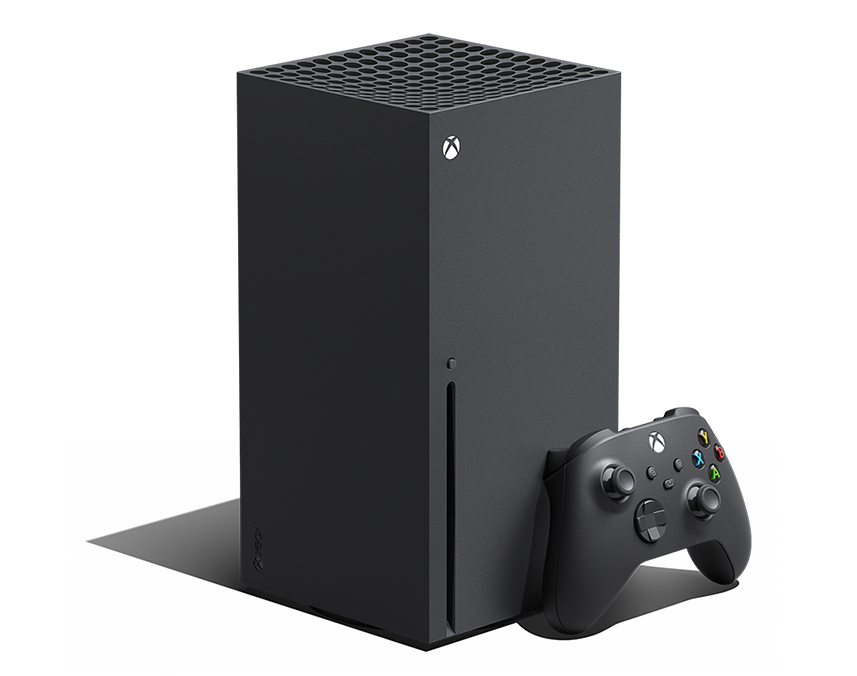

In [59]:
#Define Path
current_working_directory = os.getcwd()
folder_stash = "Artifacts" 
image_path = os.path.join(current_working_directory, folder_stash, "XBOX.png")  #write the file to stashed dir

#TEST
print("Current dir: ", current_working_directory)
print("Final img path: ", image_path)

#Write file
with open(image_path, "wb") as image:
    image.write(resp.content)

#View Image
Image.open(image_path)   # PIL.Image.open()  ->opens an Image file


## REST using Python

In [1]:
import requests

### GET Requests

In [2]:
url_get = "http://httpbin.org/get"
payload = {"name":"Joseph","ID":"123"}

resp_get = requests.get(url_get,params=payload)
resp_get.status_code

200

In [3]:
#print URL + query string
resp_get.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [ ]:
#Request Body = *no req body*
print(f"Request body: {resp_get.request.body}")

Request body: None


In [5]:
#Status code
resp_get.status_code

200

In [6]:
#Response Text
print(resp_get.text) #returns-> str

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-68386406-315bc5ee4bc5a60764149895"
  }, 
  "origin": "49.205.39.79", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



In [7]:
#Look at the `Content-Type`
resp_get.headers['Content-Type']

'application/json'

In [8]:
#Response as JSON
resp_get.json()  #JSON format

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-68386406-315bc5ee4bc5a60764149895'},
 'origin': '49.205.39.79',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [9]:
#The key 'args' has the name and values:
resp_get.json()['args']

{'ID': '123', 'name': 'Joseph'}

### POST Requests

In [10]:
#test payload
payload

{'name': 'Joseph', 'ID': '123'}

In [11]:
url_post = "http://httpbin.org/post"

resp_post = requests.post(url_post, data=payload)

In [12]:
resp_post.status_code

200

In [14]:
#GET vs POST url
print("GET request URL:", resp_get.url)
print("POST request URL:",resp_post.url) #POST sends payload in the Body

GET request URL: http://httpbin.org/get?name=Joseph&ID=123
POST request URL: http://httpbin.org/post


In [ ]:
resp_post.request.body  #PUT request body -has the params

'name=Joseph&ID=123'

In [16]:
resp_get.request.body   #GET request -has no body

In [17]:
resp_post.headers['Content-Type']

'application/json'

In [18]:
resp_post.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '18',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-6838644f-666d2cd13d6f4b0159bce1c1'},
 'json': None,
 'origin': '49.205.39.79',
 'url': 'http://httpbin.org/post'}

In [19]:
#view the form
resp_post.json()['form']

{'ID': '123', 'name': 'Joseph'}

See more in `Requests` library for Python:>> <a href="https://requests.readthedocs.io/en/latest/?utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_term=10006555">Requests</a>

--end--